In [1]:
# load necessary package

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler

import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

In [2]:
# mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load the data

# training data
saleste_data = pd.read_csv('/content/drive/MyDrive/MATH5470/dataset/sales_train_evaluation.csv') # main information during d_1 - d_1941
salestv_data = pd.read_csv('/content/drive/MyDrive/MATH5470/dataset/sales_train_validation.csv') # main information during d_1 - d_1913, ground truth of validation is provided in train_sales
cal_data = pd.read_csv('/content/drive/MyDrive/MATH5470/dataset/calendar.csv')                   # calendar data
sellp_data = pd.read_csv('/content/drive/MyDrive/MATH5470/dataset/sell_prices.csv')              # the price of products
# submission file
ss_data = pd.read_csv('/content/drive/MyDrive/MATH5470/dataset/sample_submission.csv')                

# EDA (Exploratory Data Analysis)

In [4]:
salestv_data.info() # 30490 products

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB


In [ ]:
salestv_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [ ]:
salestv_data.tail()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3
30489,FOODS_3_827_WI_3_validation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
saleste_data.info() # 30490 products

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 452.9+ MB


In [ ]:
saleste_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [ ]:
cal_data.info() # 1969 days

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [ ]:
cal_data.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [ ]:
sellp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


In [ ]:
sellp_data.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [ ]:
ss_data.info()  # totally 60980 entries
                # the first 30490 entries are for validation result
                # the last 30490 entries are for evaluation result

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60980 entries, 0 to 60979
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      60980 non-null  object
 1   F1      60980 non-null  int64 
 2   F2      60980 non-null  int64 
 3   F3      60980 non-null  int64 
 4   F4      60980 non-null  int64 
 5   F5      60980 non-null  int64 
 6   F6      60980 non-null  int64 
 7   F7      60980 non-null  int64 
 8   F8      60980 non-null  int64 
 9   F9      60980 non-null  int64 
 10  F10     60980 non-null  int64 
 11  F11     60980 non-null  int64 
 12  F12     60980 non-null  int64 
 13  F13     60980 non-null  int64 
 14  F14     60980 non-null  int64 
 15  F15     60980 non-null  int64 
 16  F16     60980 non-null  int64 
 17  F17     60980 non-null  int64 
 18  F18     60980 non-null  int64 
 19  F19     60980 non-null  int64 
 20  F20     60980 non-null  int64 
 21  F21     60980 non-null  int64 
 22  F22     60980 non-null

In [ ]:
ss_data.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ss_data.tail()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
60975,FOODS_3_823_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60976,FOODS_3_824_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60977,FOODS_3_825_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60978,FOODS_3_826_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60979,FOODS_3_827_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Distribution of Product across Categories & Departments

In [5]:
df_by_cat = saleste_data.groupby(['cat_id'])['id'].count().reset_index(name='count_by_cat')
fig = px.pie(df_by_cat, values='count_by_cat', names='cat_id', 
            color_discrete_sequence=px.colors.sequential.Blugrn,
            width = 700, height=500, title = 'Distribution of Products Across Categories')
fig.show()

In [6]:
df_by_state = saleste_data.groupby(['state_id'])['id'].count().reset_index(name='count_by_state')
fig = px.pie(df_by_state, values='count_by_state', names='state_id', 
            color_discrete_sequence=px.colors.sequential.Sunset,
            width = 700, height=500, title = 'Distribution of Products Across States')
fig.show()

In [7]:
df_by_depart = saleste_data.groupby(['dept_id'])['id'].count().reset_index(name='count_by_depart')
fig = px.pie(df_by_depart, values='count_by_depart', names='dept_id', 
            color_discrete_sequence=px.colors.sequential.Mint,
            width = 700, height=500, title = 'Distribution of Products Across Departments')
fig.show()

## Distribution of Products along the Time

In [8]:
# extract data
ids = sorted(list(set(saleste_data['id'])))
d_cols = [c for c in saleste_data.columns if 'd_' in c]
sales_pure = saleste_data.set_index('id')[d_cols].T.merge(cal_data.set_index('d')['date'],
            left_index=True,
            right_index=True,
            validate='1:1').set_index('date')
sales_pure.head()

,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_006_CA_1_evaluation,HOBBIES_1_007_CA_1_evaluation,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_009_CA_1_evaluation,HOBBIES_1_010_CA_1_evaluation,...,FOODS_3_818_WI_3_evaluation,FOODS_3_819_WI_3_evaluation,FOODS_3_820_WI_3_evaluation,FOODS_3_821_WI_3_evaluation,FOODS_3_822_WI_3_evaluation,FOODS_3_823_WI_3_evaluation,FOODS_3_824_WI_3_evaluation,FOODS_3_825_WI_3_evaluation,FOODS_3_826_WI_3_evaluation,FOODS_3_827_WI_3_evaluation
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,0,0,0,0,0,0,0,12,2,0,...,0,14,1,0,4,0,0,0,0,0
2011-01-30,0,0,0,0,0,0,0,15,0,0,...,0,11,1,0,4,0,0,6,0,0
2011-01-31,0,0,0,0,0,0,0,0,7,1,...,0,5,1,0,2,2,0,0,0,0
2011-02-01,0,0,0,0,0,0,0,0,3,0,...,0,6,1,0,5,2,0,2,0,0
2011-02-02,0,0,0,0,0,0,0,0,0,0,...,0,5,1,0,2,0,0,2,0,0


In [9]:
store_list = sellp_data['store_id'].unique()
fig = go.Figure()
# draw figures for every store
for s in store_list:
    store_items = [c for c in sales_pure.columns if s in c]
    data = sales_pure[store_items].sum(axis=1).rolling(90).mean()
    fig.add_trace(go.Scatter(x=np.arange(len(data)), y=data, name=s))
    
fig.update_layout(yaxis_title="Average Sales Per Day", xaxis_title="Day", title="Average Sales across Time Per Store_id")

In [10]:
cat_list = ['FOOD', 'HOUSEHOLD', 'HOBBIES']
fig = go.Figure()
# draw figures for every store
for s in cat_list:
    cat_items = [c for c in sales_pure.columns if s in c]
    data = sales_pure[cat_items].sum(axis=1).rolling(90).mean()
    fig.add_trace(go.Scatter(x=np.arange(len(data)), y=data, name=s))
    
fig.update_layout(yaxis_title="Average Sales Per Day", xaxis_title="Day", title="Average Sales across Time Per Store_id")

In [11]:
x_1 = saleste_data.loc[saleste_data['id'] == ids[0]].set_index('id')[d_cols].values[0][:100]
x_2 = saleste_data.loc[saleste_data['id'] == ids[4]].set_index('id')[d_cols].values[0][1300:1400]
x_3 = saleste_data.loc[saleste_data['id'] == ids[65]].set_index('id')[d_cols].values[0][350:450]
fig = make_subplots(rows=3, cols=1, subplot_titles=("Product 1", "Product 2", "Product 3"))

fig.add_trace(go.Scatter(x=np.arange(len(x_1)), y=x_1, showlegend=False, mode='lines+markers',marker=dict(color="orange")),
             row=1, col=1)

fig.add_trace(go.Scatter(x=np.arange(len(x_2)), y=x_2, showlegend=False, mode='lines+markers', marker=dict(color="red")),
             row=2, col=1)

fig.add_trace(go.Scatter(x=np.arange(len(x_3)), y=x_3, showlegend=False, mode='lines+markers', marker=dict(color="violet")),
             row=3, col=1)

fig.update_layout(height=1200, width=400, title_text="Sample Sales Snippets")
fig.show()


# Preprocessing



In [ ]:
# float --> int
salestv_data_save = salestv_data
float_data = [column for column in salestv_data_save if salestv_data_save[column].dtype == 'float64']
int_data = [column for column in salestv_data_save if salestv_data_save[column].dtype in ['int32', 'int64']]
salestv_data_save[float_data] = salestv_data_save[float_data].astype(np.float32)
salestv_data_save[int_data] = salestv_data_save[int_data].astype(np.int16)
print(salestv_data_save.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int16(1913), object(6)
memory usage: 112.6+ MB
None


In [ ]:
# get the data in exact format with dates as rows
salestv_data_save = salestv_data_save.T
salestv_data_save.shape
salestv_data_save.head(10)

,0,1,2,3,4,5,6,7,8,9,...,30480,30481,30482,30483,30484,30485,30486,30487,30488,30489
id,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,...,FOODS_3_818_WI_3_validation,FOODS_3_819_WI_3_validation,FOODS_3_820_WI_3_validation,FOODS_3_821_WI_3_validation,FOODS_3_822_WI_3_validation,FOODS_3_823_WI_3_validation,FOODS_3_824_WI_3_validation,FOODS_3_825_WI_3_validation,FOODS_3_826_WI_3_validation,FOODS_3_827_WI_3_validation
item_id,HOBBIES_1_001,HOBBIES_1_002,HOBBIES_1_003,HOBBIES_1_004,HOBBIES_1_005,HOBBIES_1_006,HOBBIES_1_007,HOBBIES_1_008,HOBBIES_1_009,HOBBIES_1_010,...,FOODS_3_818,FOODS_3_819,FOODS_3_820,FOODS_3_821,FOODS_3_822,FOODS_3_823,FOODS_3_824,FOODS_3_825,FOODS_3_826,FOODS_3_827
dept_id,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,...,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3
cat_id,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,...,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS
store_id,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,...,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3
state_id,CA,CA,CA,CA,CA,CA,CA,CA,CA,CA,...,WI,WI,WI,WI,WI,WI,WI,WI,WI,WI
d_1,0,0,0,0,0,0,0,12,2,0,...,0,14,1,0,4,0,0,0,0,0
d_2,0,0,0,0,0,0,0,15,0,0,...,0,11,1,0,4,0,0,6,0,0
d_3,0,0,0,0,0,0,0,0,7,1,...,0,5,1,0,2,2,0,0,0,0
d_4,0,0,0,0,0,0,0,0,3,0,...,0,6,1,0,5,2,0,2,0,0


In [ ]:
#remove first 6 rows no need
salestv_data_save = salestv_data_save[6:]
salestv_data_save.head(10)

,0,1,2,3,4,5,6,7,8,9,...,30480,30481,30482,30483,30484,30485,30486,30487,30488,30489
d_1,0,0,0,0,0,0,0,12,2,0,...,0,14,1,0,4,0,0,0,0,0
d_2,0,0,0,0,0,0,0,15,0,0,...,0,11,1,0,4,0,0,6,0,0
d_3,0,0,0,0,0,0,0,0,7,1,...,0,5,1,0,2,2,0,0,0,0
d_4,0,0,0,0,0,0,0,0,3,0,...,0,6,1,0,5,2,0,2,0,0
d_5,0,0,0,0,0,0,0,0,0,0,...,0,5,1,0,2,0,0,2,0,0
d_6,0,0,0,0,0,0,0,4,2,0,...,0,13,2,0,7,3,5,4,0,0
d_7,0,0,0,0,0,0,0,6,3,0,...,0,18,1,0,8,1,0,1,0,0
d_8,0,0,0,0,0,0,0,5,9,0,...,0,13,3,0,4,4,1,8,0,0
d_9,0,0,0,0,0,0,0,7,0,0,...,0,18,4,0,4,1,1,5,0,0
d_10,0,0,0,0,0,0,0,0,0,0,...,0,19,1,0,1,0,3,2,0,0


In [ ]:
daysBeforeEvent = pd.DataFrame(np.zeros((1969,1)))

In [ ]:
for x, y in cal_data.iterrows():
    if x!=0 and (pd.isnull(cal_data['event_name_1'][x]) == False):
        daysBeforeEvent[0][x-1]=1

In [ ]:
daysBeforeTest = daysBeforeEvent[1913:1941]
daysBeforeTrain = daysBeforeEvent[0:1913]
# print(daysBeforeTest.shape)
# print(daysBeforeTest)

In [ ]:
daysBeforeTrain.columns = ['oneDayBeforeEvent']
daysBeforeTrain.index = salestv_data_save.index

In [ ]:
final_data = pd.concat([salestv_data_save, daysBeforeTrain], axis=1)
# print(final_data)

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
final_data_scaled = sc.fit_transform(final_data)
print(final_data_scaled)
final_data_scaled.shape

/Users/dec/opt/anaconda3/envs/m5/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/dec/opt/anaconda3/envs/m5/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.16666667 ... 0.25       0.         0.        ]
 [0.2        0.         0.16666667 ... 0.08333333 0.         0.        ]
 [0.2        0.         0.16666667 ... 0.25       0.         0.        ]]


(1913, 30491)

In [ ]:
X_train = []
y_train = []

for i in range(14,1913):
    X_train.append(final_data_scaled[i-14:i])
    y_train.append(final_data_scaled[i][0:30490])

In [ ]:
X_eval=np.array(X_train[int(0.9*len(X_train)):])
y_eval=np.array(y_train[int(0.9*len(y_train)):])
print(X_eval.shape)
print(y_eval.shape)

(190, 14, 30491)
(190, 30490)


In [ ]:
X_train = np.array(X_train[:int(0.9*len(X_train))])
y_train = np.array(y_train[:int(0.9*len(y_train))])
print(X_train.shape)
print(y_train.shape)

(1709, 14, 30491)
(1709, 30490)


# LSTM model

In [ ]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.val_loss['batch'].append(logs.get('val_loss'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.val_loss['epoch'].append(logs.get('val_loss'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            plt.plot(iters, self.val_loss[loss_type], 'r', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('mse-loss')
        plt.legend(loc="upper right")
        plt.savefig('./epoch_loss.jpg')
        plt.show()

Train on 1709 samples, validate on 190 samples
Epoch 1/60
1709/1709 [==============================] - 45s 27ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0200 - val_mse: 0.0200
Epoch 2/60
1709/1709 [==============================] - 37s 22ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 3/60
1709/1709 [==============================] - 38s 22ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 4/60
1709/1709 [==============================] - 37s 22ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 5/60
1709/1709 [==============================] - 37s 22ms/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 6/60
1709/1709 [==============================] - 44s 26ms/step - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 7/60
1709/1709 [==============================] - 37s 22ms/step - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0187 - val_mse: 0.0187
E

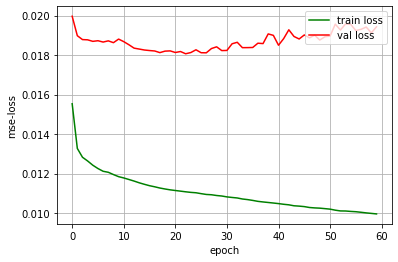

In [ ]:
regressor = Sequential()

layer_1_units = 40
regressor.add(LSTM(units=layer_1_units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

layer_2_units = 300
regressor.add(LSTM(units=layer_2_units, return_sequences=True))
regressor.add(Dropout(0.2))

layer_3_units = 300
regressor.add(LSTM(units=layer_3_units))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=30490))

regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

epoch_no = 60  # 20 is the best
batch_size_RNN = 44
history = LossHistory()
regressor.fit(X_train, y_train, validation_data=(X_eval, y_eval), epochs=epoch_no, batch_size=batch_size_RNN,
              callbacks=[history])
history.loss_plot('epoch')


In [ ]:
inputs = final_data[-14:]
inputs = sc.transform(inputs)
print(inputs)

/Users/dec/opt/anaconda3/envs/m5/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.08333333 0.         0.        ]
 [0.         0.         0.16666667 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.16666667 ... 0.25       0.         0.        ]
 [0.2        0.         0.16666667 ... 0.08333333 0.         0.        ]
 [0.2        0.         0.16666667 ... 0.25       0.         0.        ]]


In [ ]:
X_test = []
X_test.append(inputs[0:14])
X_test = np.array(X_test)
print(X_test.shape)
predictions = []

for j in range(14, 42):
    predicted_sales = regressor.predict(X_test[0, j-14:j].reshape(1, 14,30491))
    testInput = np.column_stack((np.array(predicted_sales), daysBeforeTest[0][1899+j]))
    X_test = np.append(X_test, testInput).reshape(1, j+1, 30491)
    predicted_sales = sc.inverse_transform(testInput)[:,0:30490]
    predictions.append(predicted_sales)
print(testInput.shape)

(1, 14, 30491)
(1, 30491)


# File submission

In [ ]:
submission = pd.DataFrame(data=np.array(predictions).reshape(28,30490))
submission = submission.T
submission = pd.concat((submission, submission), ignore_index=True)

submission[['id']] = ss_data[['id']]

cols = list(submission.columns)
cols = cols[-1:]+cols[:-1]
submission = submission[cols]

colsdname = ['id'] + [f'F{i}' for i in range(1,29)]
submission.columns = colsdname

#submission.to_csv('submission.csv', index=False)